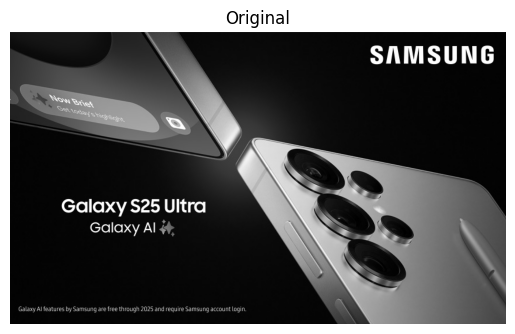

In [27]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import cv2

img = cv2.imread('./s25.jpeg', cv2.IMREAD_GRAYSCALE)
#tutorial
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.title("Original")
plt.axis("off")
plt.show()


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

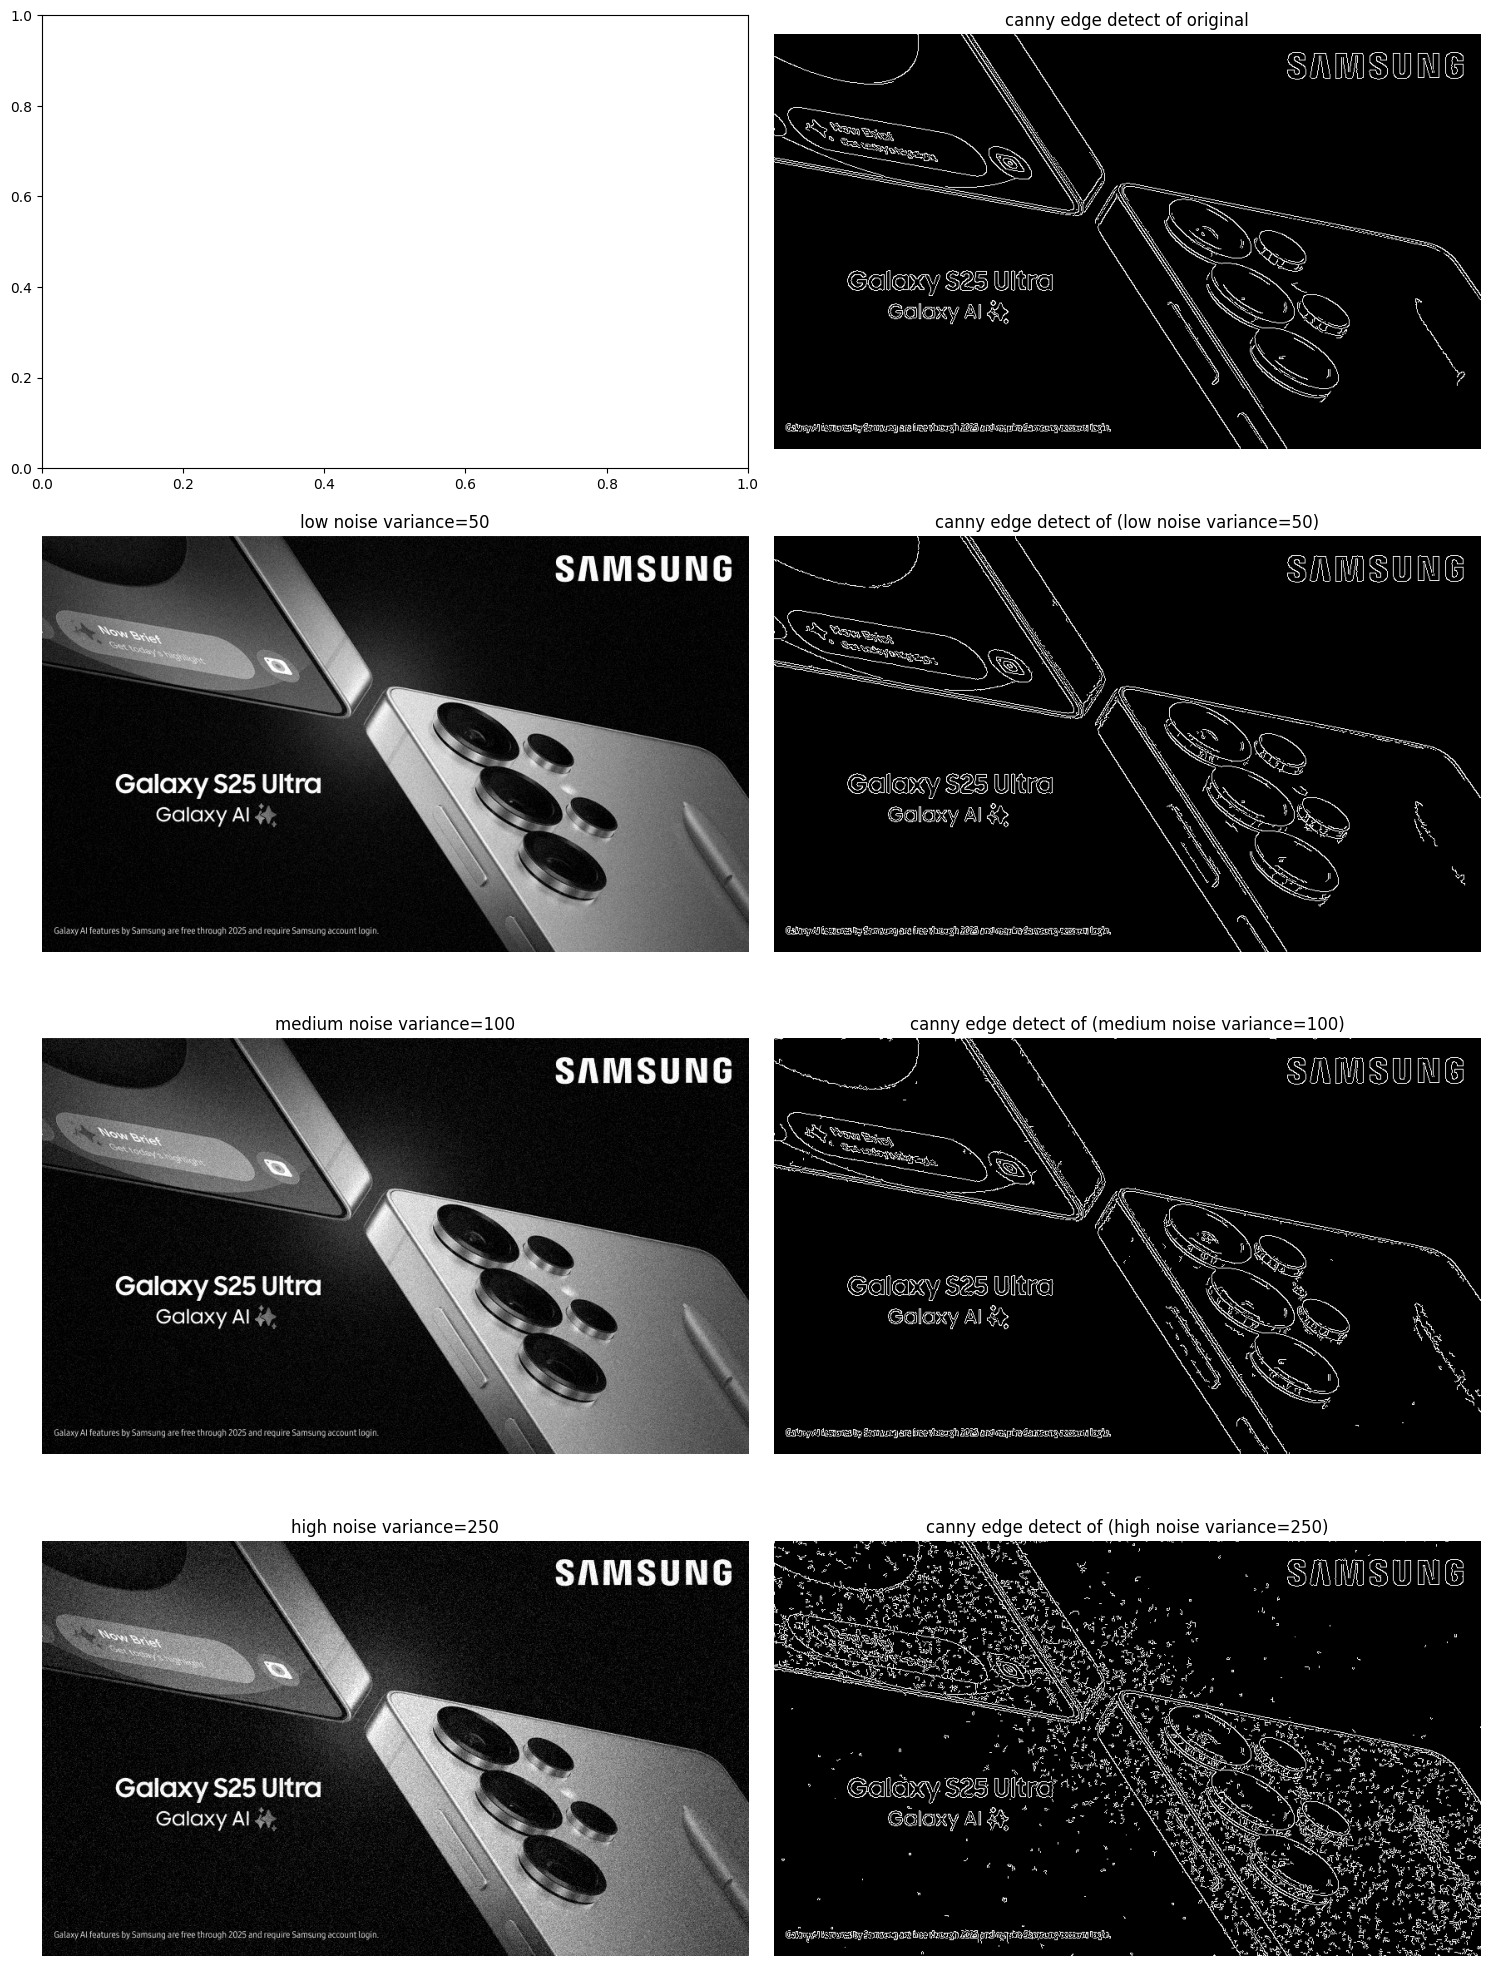

In [37]:
def gauassian_noise(img, variance=10, default=0):
  """
  variance = deviation^2
  adding noise to the image for edge detection.
  returning noise added image.
  """
  deviation = np.sqrt(variance)
  gaussian_noise = np.random.normal(loc=default, scale=deviation, size=img.shape)
  new = img.astype(np.float32) + gaussian_noise
  #sanity for under/overflow
  return np.clip(new, 0, 255).astype(np.uint8)


levels = [50,100,250]
new = [gauassian_noise(img, variance=var) for var in levels]

edges = [cv2.Canny(tmp, 100, 200) for tmp in new]
fig, axes = plt.subplots(4, 2, figsize=(15, 20))
axes[0, 0].imshow(img, cmap='gray')
axes[0, 0].set_title("Original Image")
axes[0, 0].axis("off")


#canny for original
original_edges = cv2.Canny(img, 100, 200)
axes[0, 1].imshow(original_edges, cmap='gray')
axes[0, 1].set_title("canny edge detect of original")
axes[0, 1].axis("off")




figures= ["low noise variance=50", "medium noise variance=100", "high noise variance=250"]

for i in range(len(new)):
    noise_image = new[i]
    edge_image = edges[i]
    title = figures[i]

    axes[i + 1, 0].imshow(noise_image, cmap='gray')
    axes[i + 1, 0].set_title(title)
    axes[i + 1, 0].axis("off")

    axes[i + 1, 1].imshow(edge_image, cmap='gray')
    axes[i + 1, 1].set_title(f"canny edge detect of ({title})")
    axes[i + 1, 1].axis("off")

plt.tight_layout()
plt.savefig("canny_edge_analysis_output.png", dpi=300, bbox_inches="tight")
from google.colab import files
files.download("canny_edge_analysis_output.png")



# New Section